In [1]:
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Membaca data csv

In [3]:
pd.set_option('display.max.columns', None)
df = pd.read_csv('bank.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
df.shape

(4521, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


In [11]:
from sklearn.preprocessing import LabelEncoder
mentah = df['y'].values
print('data y before:',mentah)

udah = LabelEncoder().fit_transform(mentah)
print('data y before:',udah)

data y before: ['no' 'no' 'no' ... 'no' 'no' 'no']
data y before: [0 0 0 ... 0 0 0]


In [12]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


Exploratory data analysis
==Feature selection==
Industrial knowledge
Correlation
Data distribution
Variable relationship

In [13]:
list_of_features = ['age','job','marital','education','housing','loan']

#Numeric
df[list_of_features].describe()

,age
count,4521.000000
mean,41.170095
std,10.576211
min,19.000000
25%,33.000000
50%,39.000000
75%,49.000000
max,87.000000


In [14]:
for x in list_of_features:
    print(df[x].value_counts(),'\n')

34    231
32    224
31    199
36    188
33    186
35    180
37    161
38    159
30    150
40    142
42    141
41    135
39    130
46    119
43    115
48    114
45    112
49    112
47    108
44    105
28    103
50    101
29     97
27     94
53     94
57     91
51     91
55     90
52     86
58     85
     ... 
23     20
61     16
22      9
66      9
63      8
70      7
21      7
64      7
62      7
65      6
77      6
69      6
71      6
80      6
75      6
73      6
67      5
19      4
83      4
72      4
79      4
20      3
74      3
78      3
68      2
76      2
84      1
81      1
86      1
87      1
Name: age, Length: 67, dtype: int64 

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 

married     2797
single      1196
divorced     528
Name: marital, dtype: i

In [15]:
(df['education']!='illiterate')

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
4491    True
4492    True
4493    True
4494    True
4495    True
4496    True
4497    True
4498    True
4499    True
4500    True
4501    True
4502    True
4503    True
4504    True
4505    True
4506    True
4507    True
4508    True
4509    True
4510    True
4511    True
4512    True
4513    True
4514    True
4515    True
4516    True
4517    True
4518    True
4519    True
4520    True
Name: education, Length: 4521, dtype: bool

In [16]:
df[(df['education']!='illiterate')][list_of_features].head()

,age,job,marital,education,housing,loan
0,30,unemployed,married,primary,no,no
1,33,services,married,secondary,yes,yes
2,35,management,single,tertiary,yes,no
3,30,management,married,tertiary,yes,yes
4,59,blue-collar,married,secondary,yes,no


In [17]:
#correlation for model feature
job_target_group = df.groupby(by=['job','y'])['job'].count()
job_target_group

job            y  
admin.         no     420
               yes     58
blue-collar    no     877
               yes     69
entrepreneur   no     153
               yes     15
housemaid      no      98
               yes     14
management     no     838
               yes    131
retired        no     176
               yes     54
self-employed  no     163
               yes     20
services       no     379
               yes     38
student        no      65
               yes     19
technician     no     685
               yes     83
unemployed     no     115
               yes     13
unknown        no      31
               yes      7
Name: job, dtype: int64

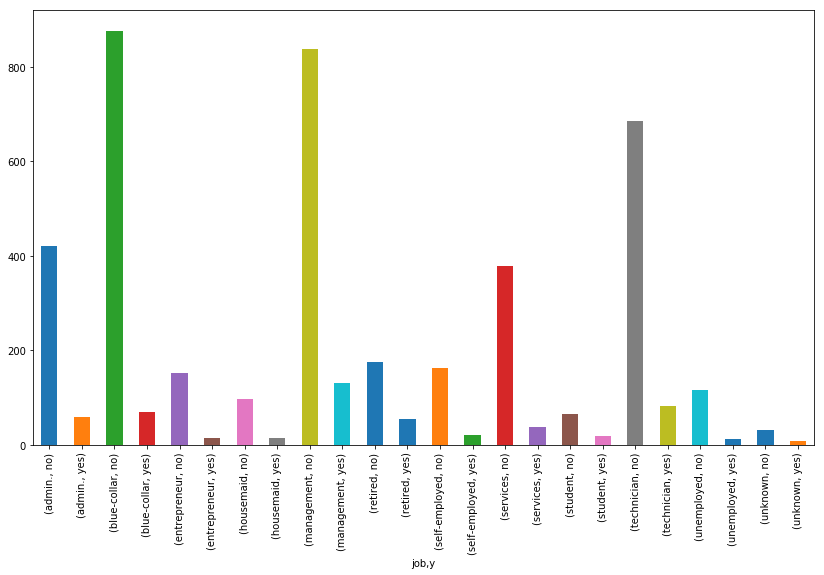

In [18]:
job_target_group.plot(kind='bar',figsize=(14,8))
plt.show()


In [19]:
df['y_after']=udah
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_after
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,0
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,0
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,0


In [20]:
udah = udah.reshape(-1,1)
udah.shape

(4521, 1)

In [21]:
u = np.array(df['age']).reshape(-1,1)
u.shape

(4521, 1)

In [22]:
#Describe

hmm = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

#Numeric
df[hmm].describe()

KeyError: "['emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'] not in index"

MACHINE LEARNING

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

le = LabelEncoder()

#Converting string labels to numbers
job_encoded = le.fit_transform(df['job'])
marital_encoded = le.fit_transform(df['marital'])
ed_encoded = le.fit_transform(df['education'])
housing_encoded = le.fit_transform(df['housing'])
loan_encoded = le.fit_transform(df['loan'])
j = np.array(job_encoded).reshape(-1,1)
m = np.array(marital_encoded).reshape(-1,1)
e = np.array(ed_encoded).reshape(-1,1)
h = np.array(housing_encoded).reshape(-1,1)
l = np.array(loan_encoded).reshape(-1,1)
np.shape(h)

(4521, 1)

In [24]:
features = np.concatenate((u,j,m,e,h,l), axis=1)
features.shape

(4521, 6)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features,udah,test_size=0.25) #80% training and 20% test

mod_KNN = KNeighborsClassifier(n_neighbors=5)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)

/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [26]:
#See accuracy
from sklearn import metrics
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.8629531388152077


/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

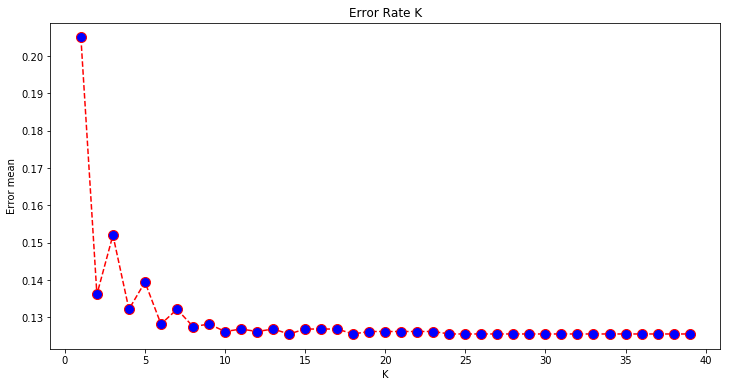

In [28]:
#Find the optimum K

error = []

#Calculating error for K value between 1 and 40
for i in range (1,40):
    mod_KNN = KNeighborsClassifier(n_neighbors=i)
    mod_KNN.fit(x_train,y_train)
    y_pred_KNN_i = mod_KNN.predict(x_test)
    error.append(np.mean(y_pred_KNN_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',
        marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K')
plt.xlabel ('K')
plt.ylabel('Error mean')
plt.show()

In [29]:
#Best model with optimum K =22
mod_KNN = KNeighborsClassifier(n_neighbors=17)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.874447391688771


/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
cm_KNN

array([[988,   1],
       [141,   1]])

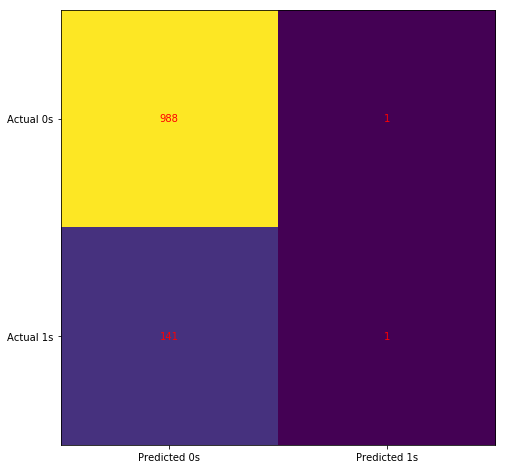

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_KNN)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_KNN[i,j], ha='center', va='center', color = 'red')
plt.show()

Logistic Regression

In [32]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler #ini hanya untuk continous
from sklearn.preprocessing import OneHotEncoder

#Normalization
print ('x_train_before:',x_train)
scaler = StandardScaler()
#HOT = OneHotEncoder()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

print ('x_train_after:',X_train)
print ('x_test_before:',x_test)
print ('x_test_after:',X_test)

x_train_before: [[27 10  2  1  0  0]
 [37  9  0  1  1  0]
 [36  3  1  1  0  0]
 ...
 [53  0  0  1  1  1]
 [44  4  1  2  1  0]
 [30  9  1  1  1  0]]
x_train_after: [[-1.32910331  1.69525275  1.40402627 -0.30480384 -1.12384045 -0.42372244]
 [-0.39229771  1.3895337  -1.95730781 -0.30480384  0.88980602 -0.42372244]
 [-0.48597827 -0.44478065 -0.27664077 -0.30480384 -1.12384045 -0.42372244]
 ...
 [ 1.10659126 -1.36193782 -1.95730781 -0.30480384  0.88980602  2.36003547]
 [ 0.26346621 -0.13906159 -0.27664077  1.02503532  0.88980602 -0.42372244]
 [-1.04806163  1.3895337  -0.27664077 -0.30480384  0.88980602 -0.42372244]]
x_test_before: [[42  8  1  3  0  0]
 [29  4  2  1  1  0]
 [72  5  1  0  0  0]
 ...
 [32  4  1  2  1  0]
 [35  0  2  1  1  0]
 [31  0  1  1  1  0]]
x_test_after: [[ 0.08591433  1.16077351 -0.1593547   2.38575728 -1.19895788 -0.42784856]
 [-1.17981556 -0.08746499  1.47910136 -0.32201139  0.83405766 -0.42784856]
 [ 3.00682947  0.22459464 -0.1593547  -1.67589573 -1.19895788 -0.42784

/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
mod_log = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',
                            random_state=0)
mod_log.fit(x_train,y_train)

/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_pred_log = mod_log.predict(x_test)

In [35]:
mod_log.score(x_train,y_train)

0.8882005899705014

In [36]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_log

array([[989,   0],
       [142,   0]])

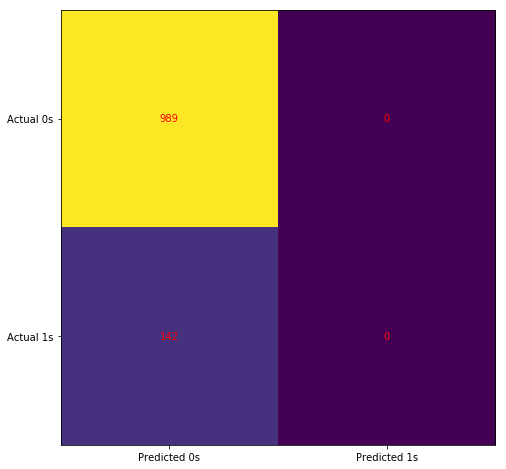

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_log)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_log[i,j], ha='center', va='center', color = 'red')
plt.show()

In [38]:
print(classification_report(y_test,y_pred_log))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       989
          1       0.00      0.00      0.00       142

avg / total       0.76      0.87      0.82      1131



/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

mod_bay = GaussianNB().fit(x_train,y_train)
mod_bay

/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [40]:
y_pred_bay = mod_bay.predict(x_test)

In [41]:
mod_bay.score(x_train,y_train)

0.8849557522123894

In [42]:
mod_bay.score(x_test,y_test)

0.8735632183908046

In [43]:
cm_bay = confusion_matrix(y_test,y_pred_bay)
cm_bay

array([[981,   8],
       [135,   7]])

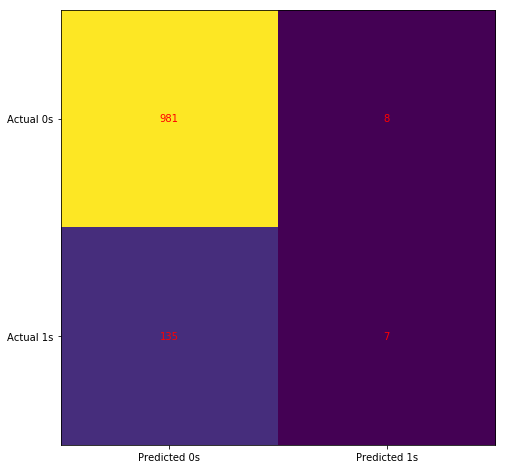

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_bay)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_bay[i,j], ha='center', va='center', color = 'red')
plt.show()

Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
mod_clf = clf.fit(x_train,y_train)
y_pred_clf = clf.predict(x_test)

In [46]:
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test,y_pred_clf))

Accuracy Decision Tree: 0.8417329796640142


In [47]:
cm_clf = confusion_matrix(y_test,y_pred_clf)
cm_clf

array([[937,  52],
       [127,  15]])

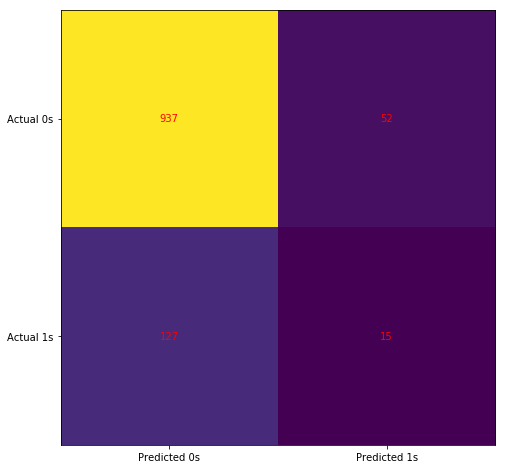

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_clf)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_clf[i,j], ha='center', va='center', color = 'red')
plt.show()

Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(n_estimators=100)
mod_rfs = rfs.fit(x_train,y_train)
y_pred_rfs = rfs.predict(x_test)

/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [50]:
print("Accuracy Random Forest:",metrics.accuracy_score(y_test,y_pred_rfs))

Accuracy Random Forest: 0.8452696728558797


In [51]:
cm_rfs = confusion_matrix(y_test,y_pred_rfs)
cm_rfs

array([[949,  40],
       [135,   7]])

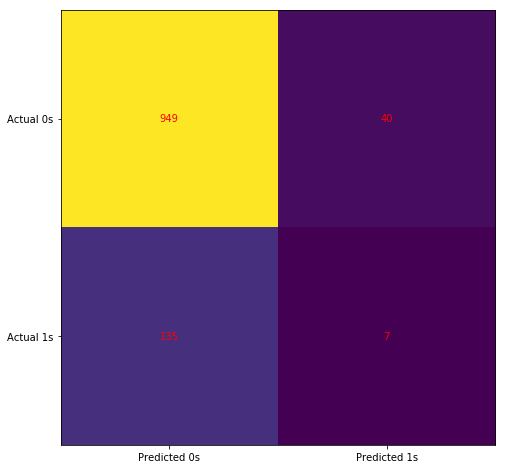

In [52]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_rfs)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_rfs[i,j], ha='center', va='center', color = 'red')
plt.show()

SVM

In [53]:
from sklearn import svm

sup = svm.SVC(kernel='linear')
mod_sup = sup.fit(x_train,y_train)
y_pred_sup = sup.predict(x_test)

/home/josh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
print("Accuracy SVM:",metrics.accuracy_score(y_test,y_pred_sup))

Accuracy SVM: 0.874447391688771


In [55]:
cm_sup = confusion_matrix(y_test,y_pred_sup)
cm_sup

array([[989,   0],
       [142,   0]])

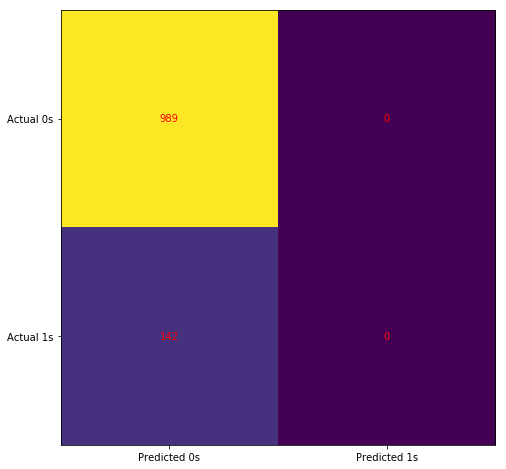

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_sup)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_sup[i,j], ha='center', va='center', color = 'red')
plt.show()

Summary

In [57]:
print("Accuracy model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))
print("Accuracy model Logistic Regression:",metrics.accuracy_score(y_test,y_pred_log))
print("Accuracy model Naive Bayes:",metrics.accuracy_score(y_test,y_pred_bay))
print("Accuracy model Decision Tree:",metrics.accuracy_score(y_test,y_pred_clf))
print("Accuracy model Random Forest:",metrics.accuracy_score(y_test,y_pred_rfs))
print("Accuracy model SVM:",metrics.accuracy_score(y_test,y_pred_sup))

Accuracy model KNN: 0.874447391688771
Accuracy model Logistic Regression: 0.874447391688771
Accuracy model Naive Bayes: 0.8735632183908046
Accuracy model Decision Tree: 0.8417329796640142
Accuracy model Random Forest: 0.8452696728558797
Accuracy model SVM: 0.874447391688771
